In [1]:
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scaleogram as scg

In [2]:
df=pd.read_csv('Sensex.csv')
df

,Date,Open,High,Low,Close
0,3-April-1979,NaN,NaN,NaN,124.15
1,4-April-1979,NaN,NaN,NaN,122.85
2,6-April-1979,NaN,NaN,NaN,123.52
3,7-April-1979,NaN,NaN,NaN,124.18
4,9-April-1979,NaN,NaN,NaN,124.30
...,...,...,...,...,...
10168,22-February-2023,60391.86,60462.90,59681.55,59744.98
10169,23-February-2023,59777.64,59960.04,59406.31,59605.80
10170,24-February-2023,59859.48,59908.77,59325.34,59463.93
10171,27-February-2023,59331.31,59441.13,58937.64,59288.35


In [3]:
df=df.drop(['Open','High','Low'],axis=1)
df['Date']=pd.to_datetime(df['Date'])
df

,Date,Close
0,1979-04-03,124.15
1,1979-04-04,122.85
2,1979-04-06,123.52
3,1979-04-07,124.18
4,1979-04-09,124.30
...,...,...
10168,2023-02-22,59744.98
10169,2023-02-23,59605.80
10170,2023-02-24,59463.93
10171,2023-02-27,59288.35


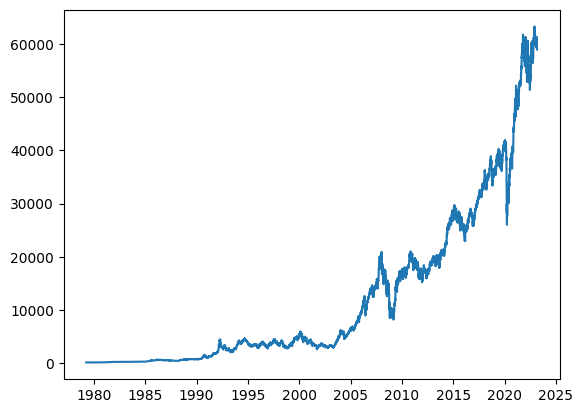

In [4]:
plt.plot(df['Date'],df['Close'])

In [5]:
df['log_ratio']=np.log(df['Close'].shift(-1) / df['Close'])

In [6]:
df['pct_change']=df['Close'].pct_change()

In [13]:
df.sort_values(by=['pct_change'])

,Date,Close,log_ratio,pct_change
9441,2020-03-23,25981.24,0.026316,-0.131526
2632,1992-04-28,3896.90,-0.058789,-0.127687
5505,2004-05-17,4505.16,0.079311,-0.111385
6619,2008-10-24,8701.07,-0.022256,-0.109564
2638,1992-05-12,3086.37,0.105894,-0.097566
...,...,...,...,...
535,1982-01-04,252.89,0.000000,0.110530
2639,1992-05-13,3431.13,-0.010739,0.111704
2619,1992-03-24,3669.58,0.035495,0.131354
6749,2009-05-18,14284.21,0.001247,0.173393


In [8]:
df.sort_values(by='log_ratio')

,Date,Close,log_ratio,pct_change
9440,2020-03-20,29915.96,-0.141017,0.057541
2631,1992-04-22,4467.32,-0.136607,0.073096
5504,2004-05-14,5069.87,-0.118092,-0.061043
6618,2008-10-23,9771.70,-0.116044,-0.039155
2637,1992-05-11,3420.05,-0.102660,-0.065049
...,...,...,...,...
534,1981-12-24,227.72,0.104838,0.007076
2638,1992-05-12,3086.37,0.105894,-0.097566
2618,1992-03-20,3243.53,0.123415,0.036931
6748,2009-05-15,12173.42,0.159900,0.025311


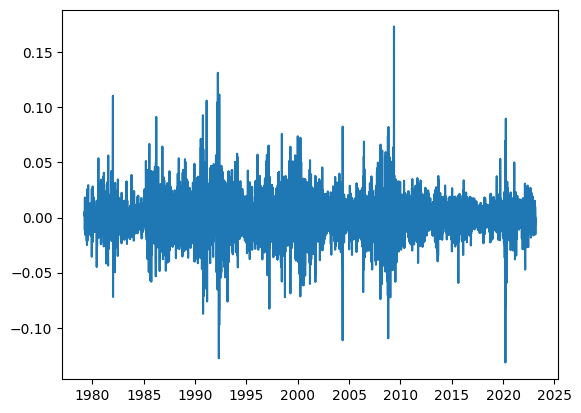

In [58]:
plt.plot(df['Date'],df['pct_change'])

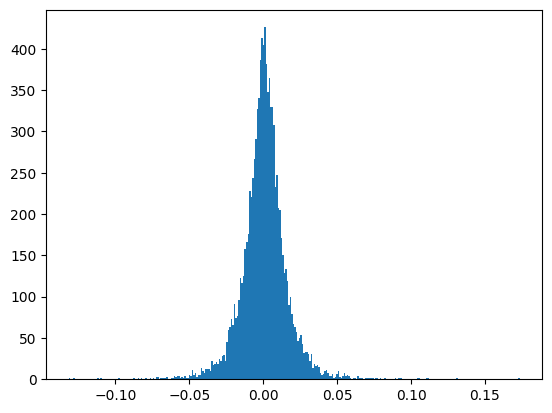

In [12]:
plt.hist(df['pct_change'],300)
plt.show()

In [61]:
df['Year']

0        1979
1        1979
2        1979
3        1979
4        1979
         ... 
10168    2023
10169    2023
10170    2023
10171    2023
10172    2023
Name: Year, Length: 10173, dtype: int64

/home/darshan/.local/lib/python3.10/site-packages/scaleogram/wfun.py:173: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = pywt.DiscreteContinuousWavelet(wavelet)
/home/darshan/.local/lib/python3.10/site-packages/scaleogram/wfun.py:173: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  wavelet = pywt.DiscreteContinuousWavelet(wavelet)
/home/darshan/.local/lib/python3.10/site-packages/scaleogram/wfun.py:173: FutureWarning: Wavelets from the family shan, without parameters specified in the name are deprecated. The name should takethe fo

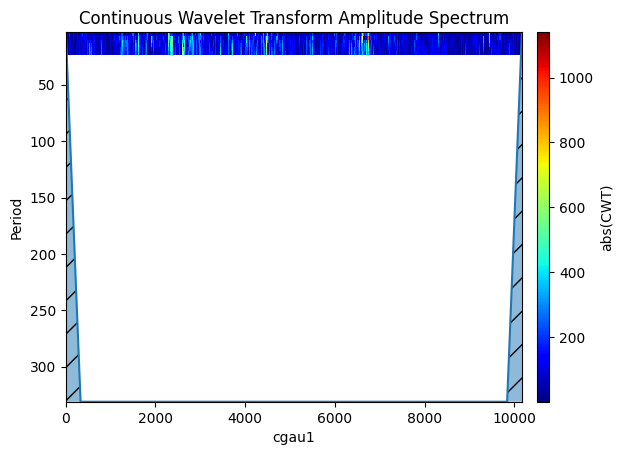

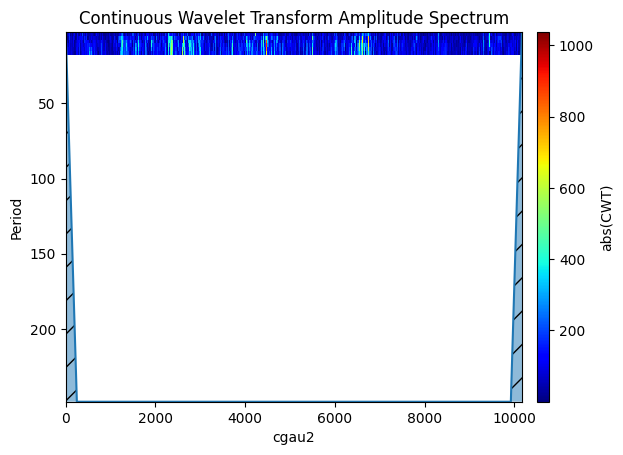

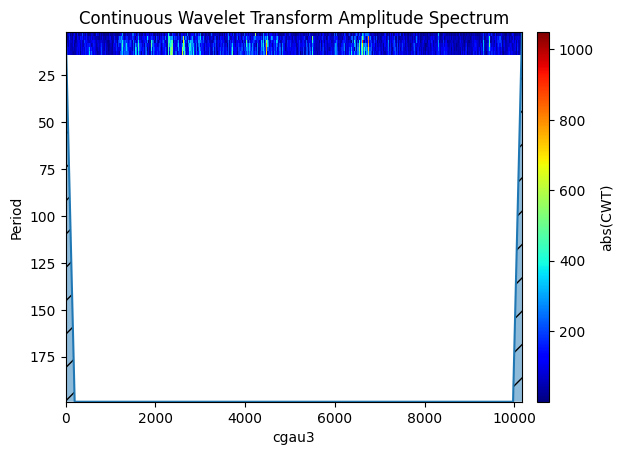

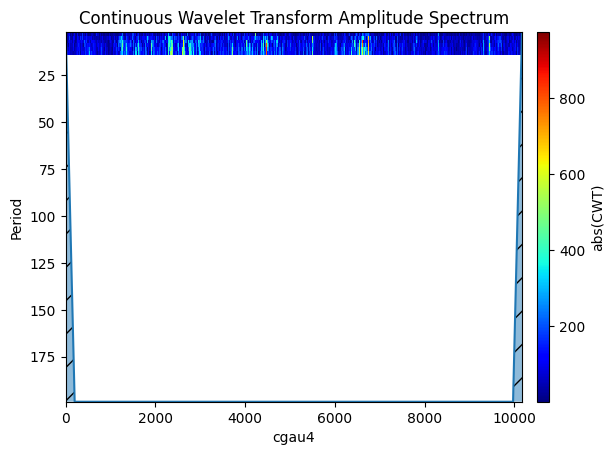

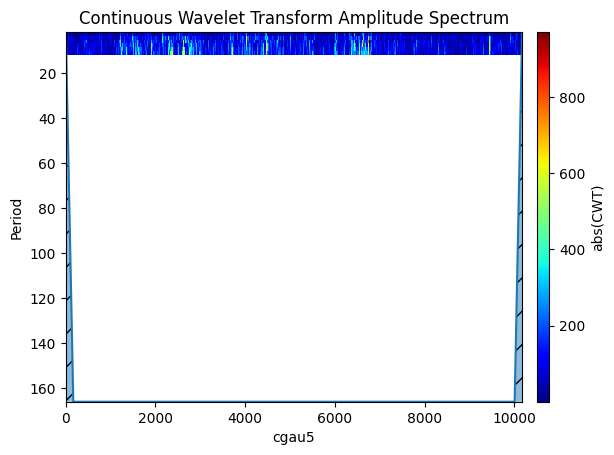

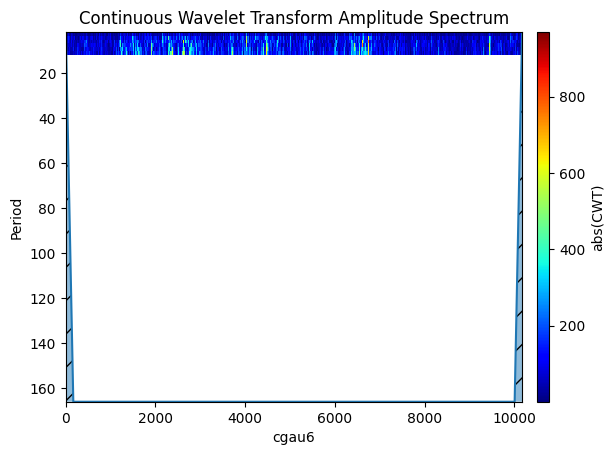

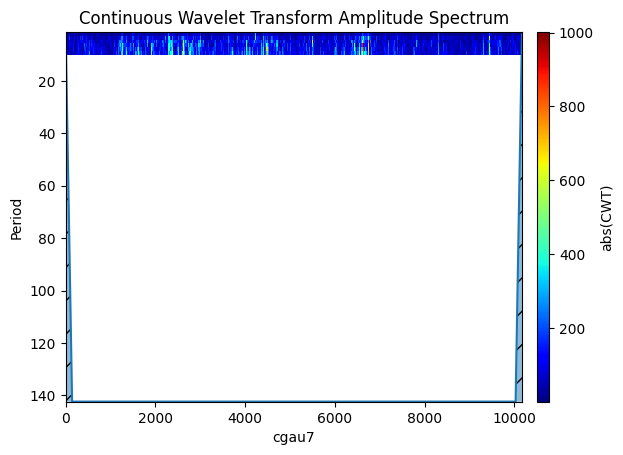

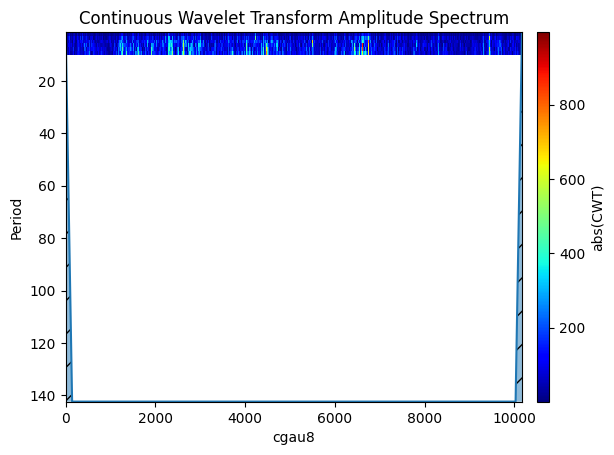

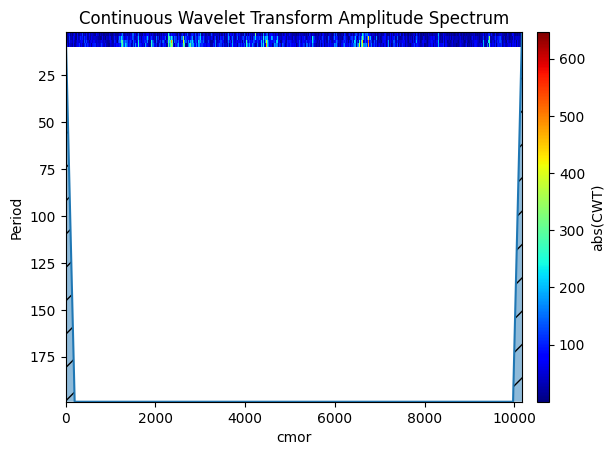

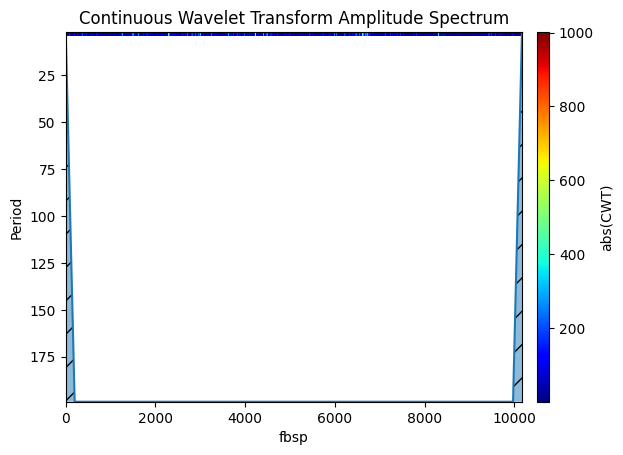

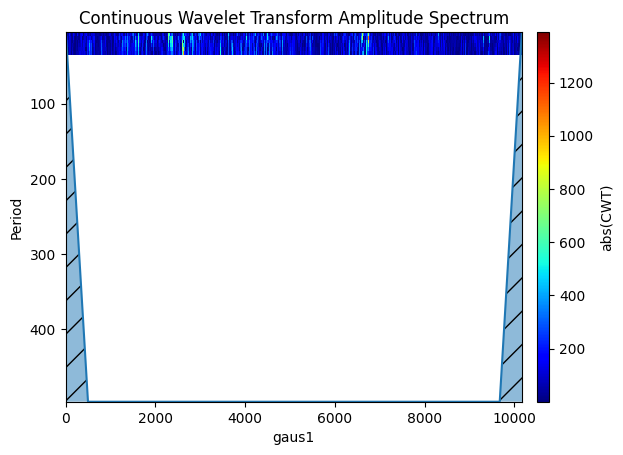

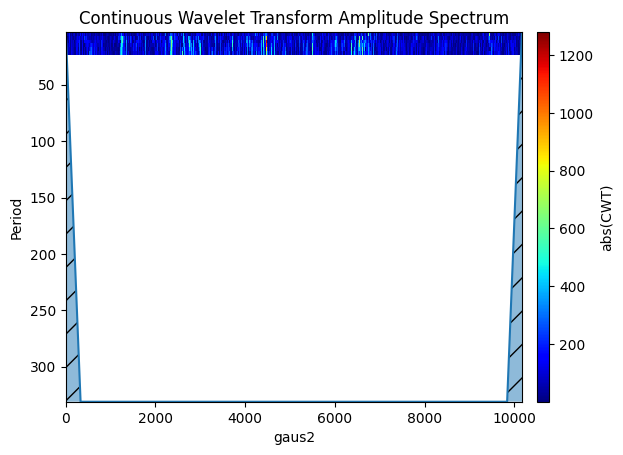

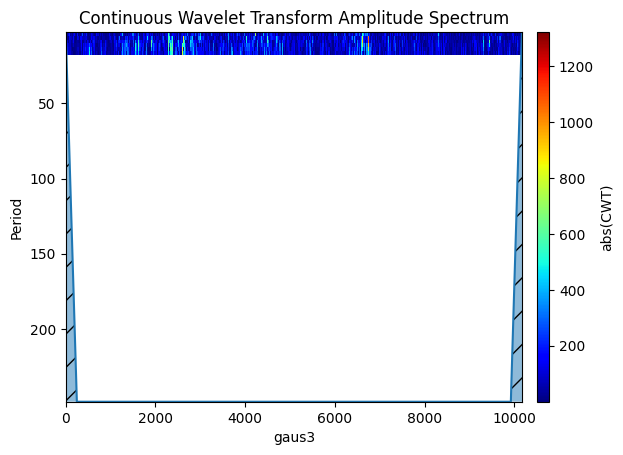

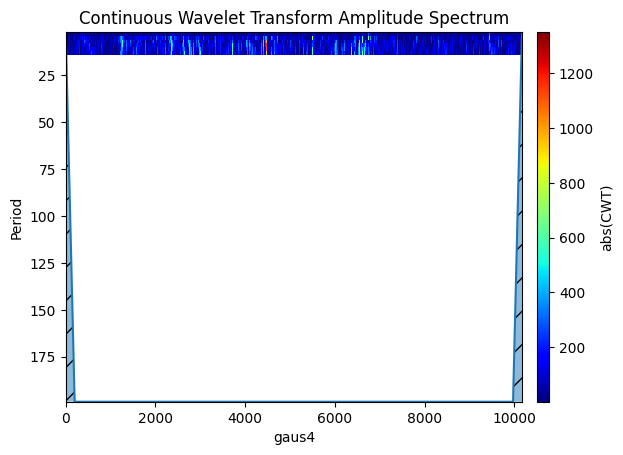

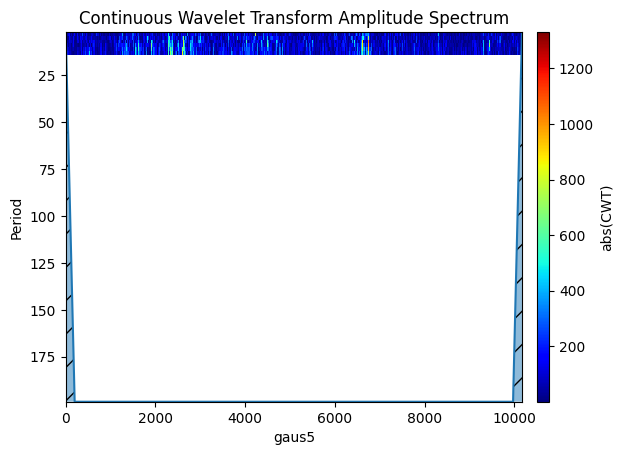

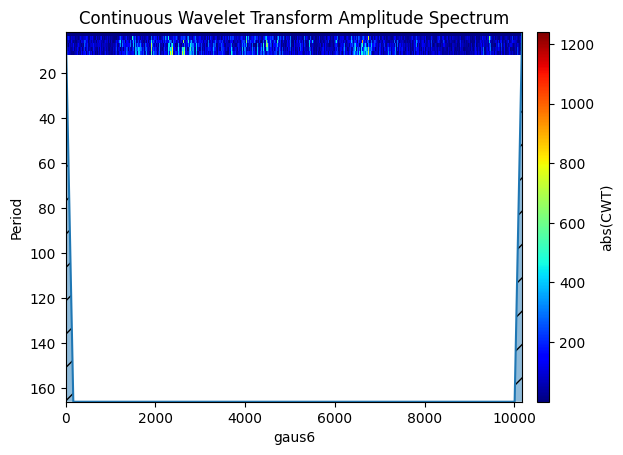

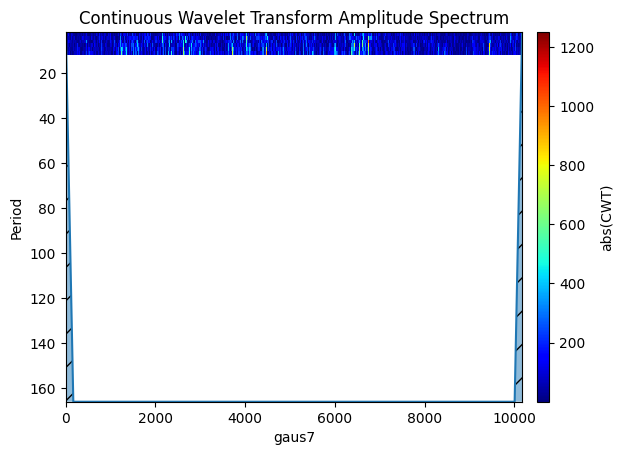

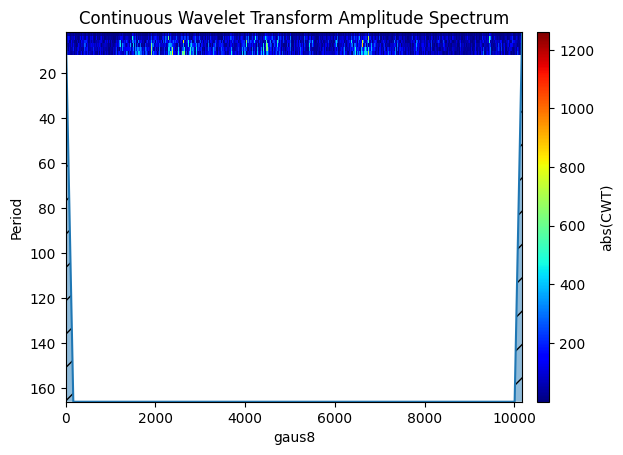

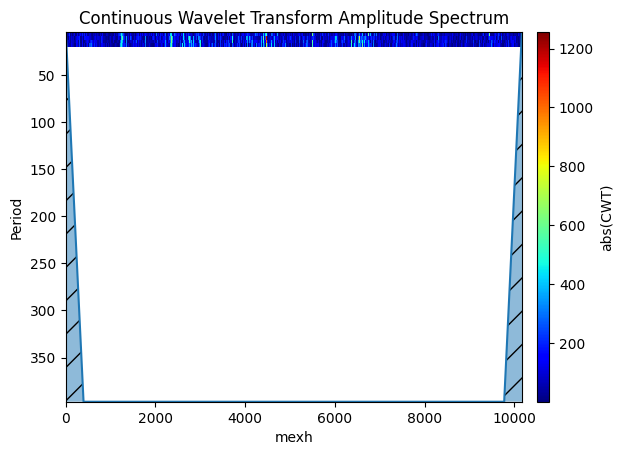

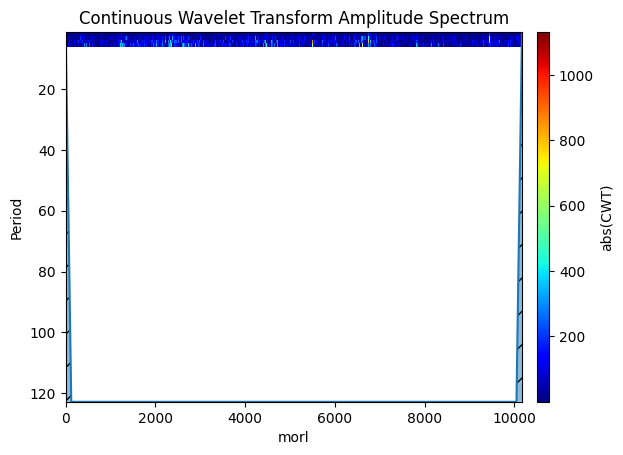

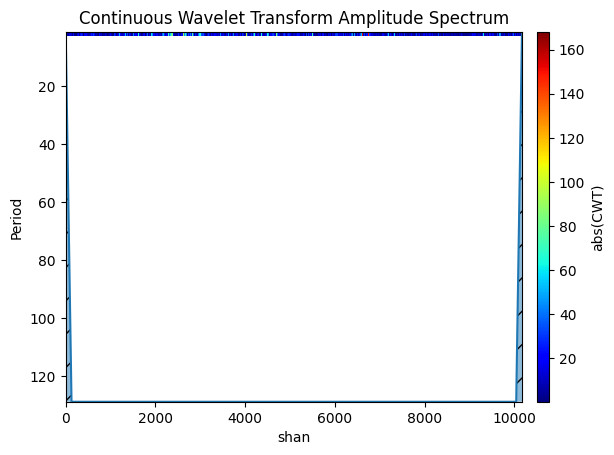

In [87]:
import time
for wave in pywt.wavelist(kind='continuous'):
   scg.cws(df.index,df['pct_change']*10000,wavelet=wave,xlabel=wave)


<AxesSubplot: title={'center': 'Continuous Wavelet Transform Amplitude Spectrum'}, xlabel='cgau1', ylabel='Period'>

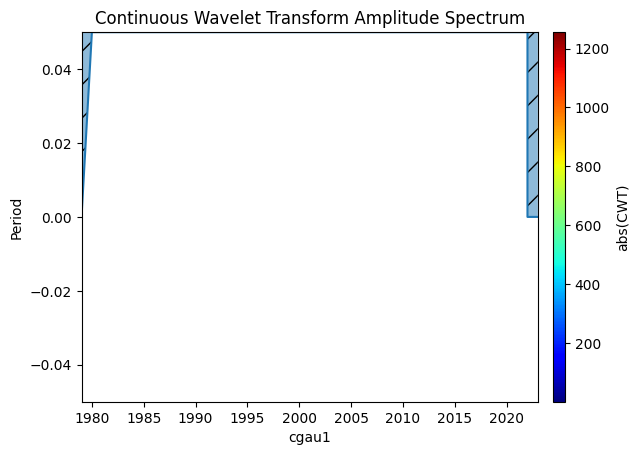

1979